<a href="https://colab.research.google.com/github/faiyaz106/Heart-Disease-Analysis-and-Prediction/blob/main/heart_disease_analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About the dataset:
### Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### Attribute Information
    1. Age: age of the patient [years]
    2. Sex: sex of the patient [M: Male, F: Female]
    3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    4. RestingBP: resting blood pressure [mm Hg]
    5. Cholesterol: serum cholesterol [mm/dl]
    6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
    11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    12. HeartDisease: output class [1: heart disease, 0: Normal]

### Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations

Hungarian: 294 observations

Switzerland: 123 observations

Long Beach VA: 200 observations

Stalog (Heart) Data Set: 270 observations

Total: 1190 observations

Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/dataset/45/heart+disease

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


In [1]:
# Load the data set
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Path for dataset
path='/drive/MyDrive/DS_dataset/heart.csv'
df=pd.read_csv(path)

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data Preprocessing

In [5]:
# Check for any Null values data
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Exploratory Data Analysis

In [6]:
# Check for data imbalance for output class
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

Output class seems balanced.

In [60]:
# Check the basic statistics of numerical data
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


<Axes: >

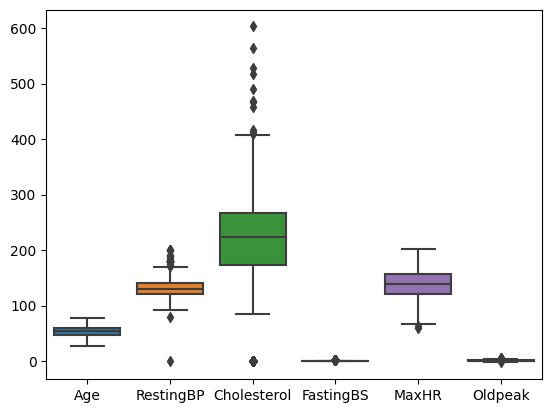

In [63]:
sns.boxplot(df)

<Axes: xlabel='FastingBS', ylabel='count'>

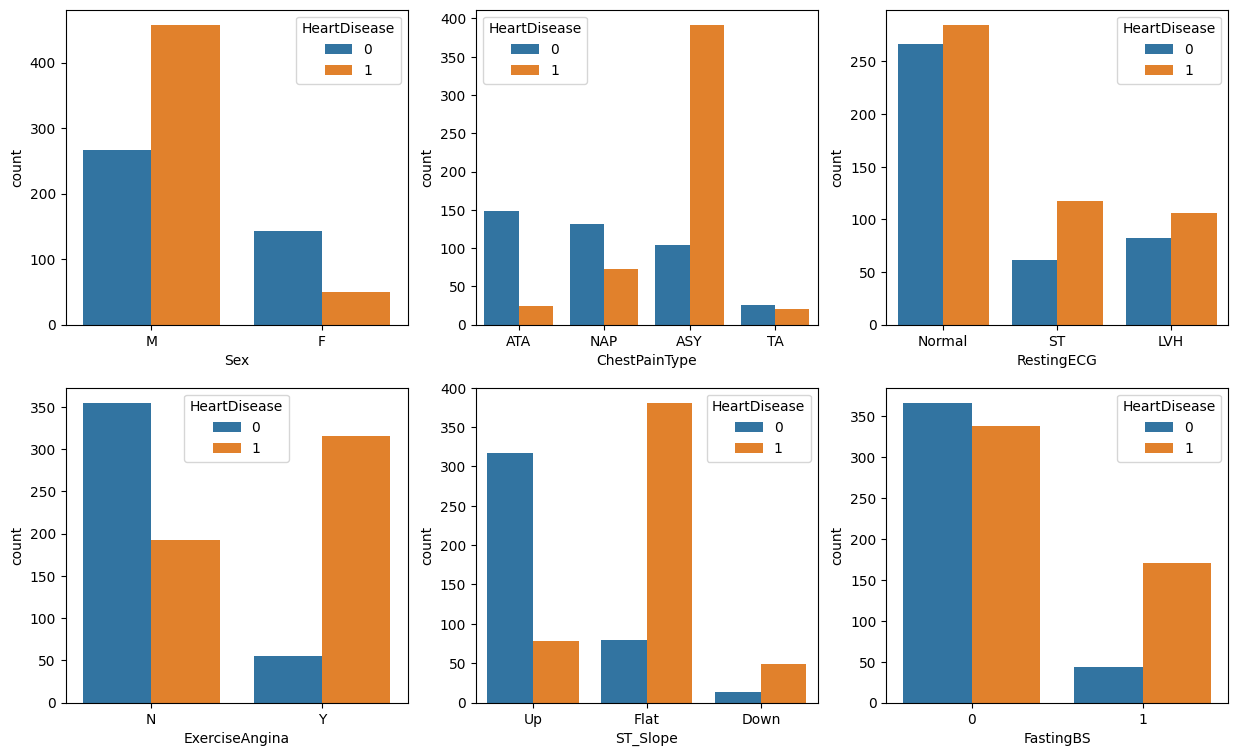

In [101]:
from matplotlib import axes
# Find the proportion of Catgorical variable
df['Sex'].value_counts(normalize=True)
fig,axs=plt.subplots(2,3,figsize=(15,9))
sns.countplot(df,x='Sex', hue='HeartDisease',ax=axs[0,0])
sns.countplot(df,x='ChestPainType',hue='HeartDisease',ax=axs[0,1])
sns.countplot(df,x='RestingECG',hue='HeartDisease',ax=axs[0,2])
sns.countplot(df,x='ExerciseAngina',hue='HeartDisease',ax=axs[1,0])
sns.countplot(df,x='ST_Slope',hue='HeartDisease',ax=axs[1,1])
sns.countplot(df,x='FastingBS',hue='HeartDisease',ax=axs[1,2])

<Axes: xlabel='RestingBP', ylabel='Count'>

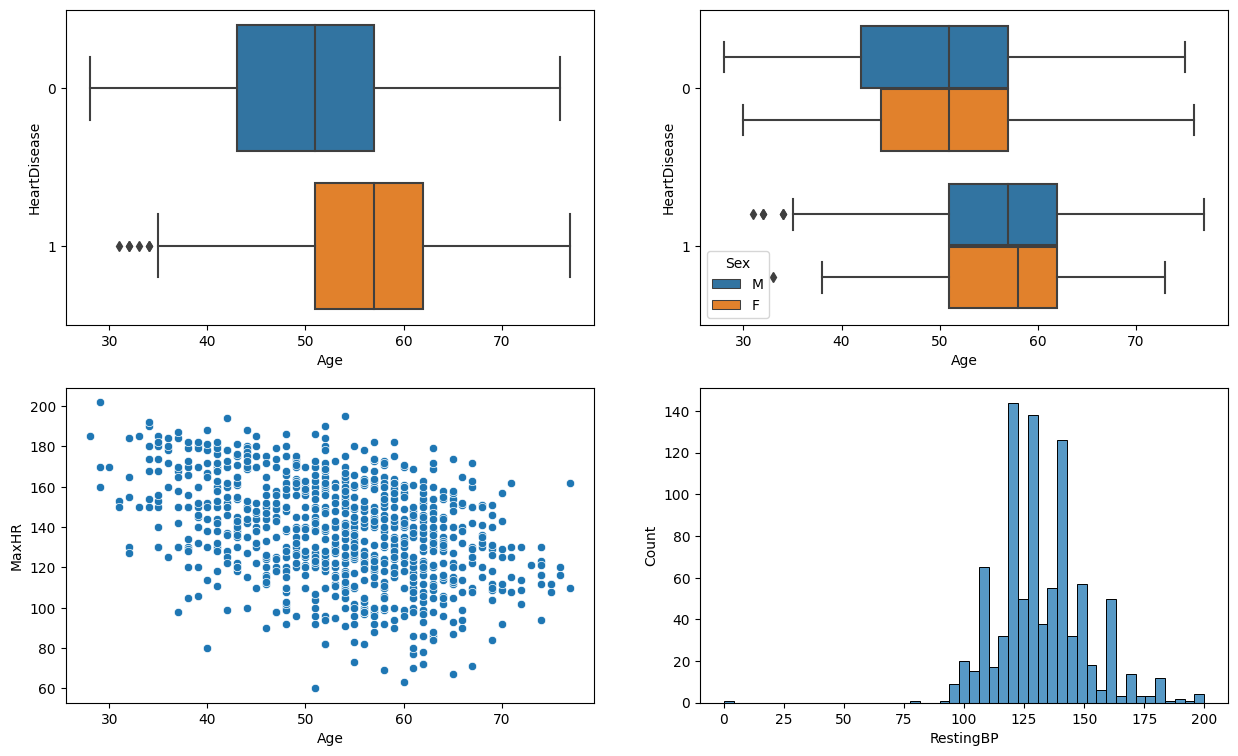

In [82]:
# Check for any distribution of 'age'
df['HeartDisease']=df['HeartDisease'].astype('category')
fig,axs=plt.subplots(2,2,figsize=(15,9))
sns.boxplot(df,x="Age",y="HeartDisease",ax=axs[0,0])
sns.boxplot(df,x="Age",y="HeartDisease",hue="Sex",ax=axs[0,1])
sns.scatterplot(df,x="Age",y="MaxHR",ax=axs[1,0])
sns.histplot(df,x="RestingBP",ax=axs[1,1])

In [ ]:
#Check the median age

### Few Observations:
1. Median Age is for those having Heart Disease is ~57 Years. (*Refer Fig1*)
2. Median Age for having heart disease is slightly greater for female than male. ( Need to verify by Hypothesis testing that there is not any difference between male and female Median age those having Heart Disease)   *(Refer: Fig2)*
3. As Age is increases, the Maximum Heart Rate tends to descrease. *(Refer Fig: 3)*
4. There is one observation where Resting BP is zero. Need to be replace with Median Value.



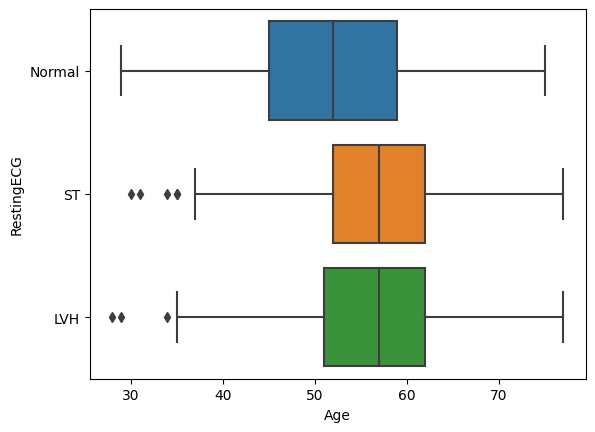

In [54]:
sns.boxplot(df,x="Age",y="RestingECG")
plt.show()